In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Problem: Binary Classification

In this exercise, you will work through a family of binary classifications. Our data consists of inputs $x_n \in \mathbb{R}^{1*d}$ and labels $y_n \in \{-1,1\}$ for $n \in \{1,...,N\}$. We will work on a subset of the Fashion-MNIST dataset which focuses on classifying whether the image is for a $Dress (y = 1)$ or a $Shirt (y = -1)$. Your goal is to learn a classifier based on linear predictor $h_\textbf{w}(x) = \textbf{w}^Tx$. Let

$\textbf{X} = \begin{bmatrix} x_1 \\ \vdots \\ x_N \end{bmatrix} \in \mathbb{R}^{N*d}$, $\textbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix} \in \{1, -1\}^N$

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [31]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


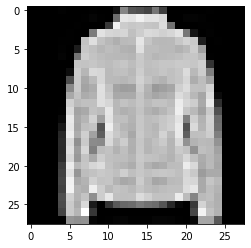

label is Shirt


In [3]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

There are 5000 values in loss_hist array.
The final value of the loss function is 0.0.
The squared l2-norm of the final weight vector is 659979038983.0.
There are 45 misclassified points in the test data using the trained perceptron.


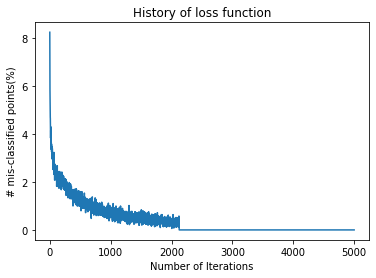

In [14]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #

for ite in range(N): # max # of iteration = N
    count = 0
    for i in range(N): # ite through each data
        x_i = np.reshape(X_train_h[i], (d+1, 1))
        if y_train[i]*(np.dot(np.transpose(W), x_i)) <= 0:
            count += 1
            W = W + y_train[i]*x_i
    loss_hist.append((count/N)*100) # percentage of mis-classified pts each ite

print(f"There are {len(loss_hist)} values in loss_hist array.")
print(f"The final value of the loss function is {loss_hist[len(loss_hist)-1]}.")
L2_square = (np.linalg.norm(W))**2
print(f"The squared l2-norm of the final weight vector is {L2_square}.")

# graphing the loss function
x_axis = np.arange(1, N+1)
plt.plot(x_axis, loss_hist)
plt.xlabel('Number of Iterations')
plt.ylabel('# mis-classified points(%)')
plt.title('History of loss function')

# Using trained perceptron
error = 0
for j in range(N_test): # for each test data
    x_j = np.reshape(X_test_h[j], (d+1, 1))
    h_j = np.dot(np.transpose(W), x_j)
    if h_j < 0: 
        predic = -1
    elif h_j > 0: 
        predic = 1
    if predic != y_test[j]:
        error += 1
print(f"There are {error} misclassified points in the test data using the trained perceptron.")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [33]:
from codes.Logistic import Logistic

In [37]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= [0.69314718]
188442.9086032702


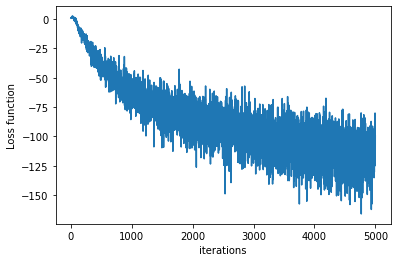

Weight squared norm 1.2504382267755798e-05
Final loss [-99.54762804]


In [38]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [52]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

7.4 %


In [ ]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #

for i in range(len(Batch)): # for each batch size
    error_arr = np.zeros(50) 
    for ite in range(50): # train the model 50 times
        N, d = X_train.shape
        logistic = Logistic(d=d, reg_param=0)
        loss_history, w = logistic.train_LR(
            X_train, y_train, eta=1e-5, batch_size=Batch[i], num_iters=6000/Batch[i])
        y_pred = logistic.predict(X_test)
        error_arr[ite] = np.sum((y_test != y_pred))*100/X_test.shape[0]
    test_err[i] = np.sum(error_arr)/len(error_arr)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem: Linear Regression
In this exercise, you will work through linear and polynomial regression. Our data consists of inputs $x_n \in \mathbb{R}$ and outputs $y_n \in \mathbb{R},n \in \{1,...,N\}$, which are related through a target function $y = f(x)$. Your goal is to learn a linear predictor $h_\textbf{w}(x)$ that best approximates $f(x)$.

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [4]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


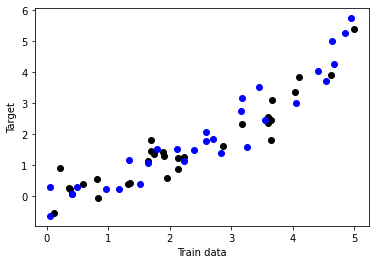

In [55]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [2]:
from codes.Regression import Regression

In [5]:
## PART (d): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value [4.28238063]
Gradient value [[ -3.19217252]
 [-10.44504584]]


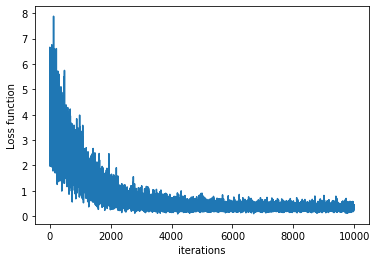

[[0.1366554 ]
 [0.70691231]]
Final loss: [0.44573285]


In [6]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

[[-0.37632138]
 [ 0.89607771]]
[0.24687249]
[[-0.26193064]
 [ 0.847731  ]]
[0.27762871]
[[0.13552822]
 [0.70668941]]
[0.19716157]
[[0.08148543]
 [0.2739193 ]]
[1.98674622]


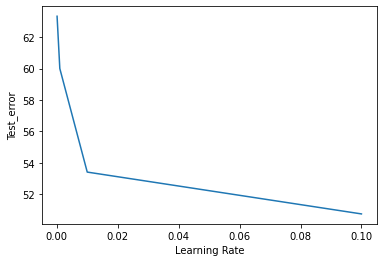

In [28]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
for i in range(len(lrs)):  # for each learning rate
    error_arr = np.zeros(50)
    for ite in range(50):  # train the model 50 times
        regression = Regression(m=1, reg_param=0)
        loss_history, w = regression.train_LR(
            X_train, y_train, eta=lrs[i], batch_size=30, num_iters=10000)
        y_pred = regression.predict(X_test)
        error_sum = 0
        for j in range(len(y_pred)):
            if round(y_test[j]) != round(y_pred[j]):
                error_sum += 1
        error_arr[ite] = error_sum*100/X_test.shape[0]
    test_err[i] = np.sum(error_arr)/len(error_arr)
    print(w)
    print(loss_history[-1])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test_li.pdf')

In [9]:
## PART (e): 
## Complete closed_form function in Regression.py file
regression = Regression(m=1, reg_param=0)
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.2641793820396444
Optimal solution gradient [-0.37906992  0.8852483 ]


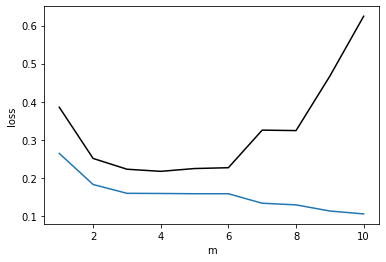

In [29]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for i in range(1, 11):
    regression = Regression(m=i, reg_param=0)
    loss_closed, w_closed = regression.closed_form(X_train, y_train)
    train_loss[i-1] = loss_closed
    
    y_pred = regression.predict(X_test) # predict label on test data using obtained 
    difference = np.subtract(np.transpose(y_pred), y_test)
    loss = (1/X_test.shape[0])*np.dot(np.transpose(difference), difference)

    test_loss[i-1] = loss
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
m = [1,2,3,4,5,6,7,8,9,10]
plt.plot(m,train_loss)
plt.plot(m,test_loss, color='black')
plt.xlabel('m')
plt.ylabel('loss')
plt.show()

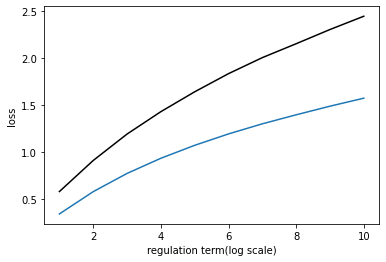

In [30]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# ================================================================ #
reg = [0, 1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]

for i in range(len(reg)):
    regression = Regression(m=10, reg_param=i)
    loss_history, w = regression.train_LR(
        X_train, y_train, eta=1e-3, batch_size=30, num_iters=10000)

    # using learned weight vector(regularized) to compute loss
    loss_train, grad_train = regression.loss_and_grad(X_train, y_train)
    loss_test, grad_test = regression.loss_and_grad(X_test, y_test)

    train_loss[i] = loss_train
    test_loss[i] = loss_test

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
x=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x,train_loss)
plt.plot(x,test_loss, color='black')
plt.xlabel('regulation term(log scale)')
plt.ylabel('loss')
plt.show()